In [48]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [49]:
theta1 = np.linspace(0, 80, 9)
theta2 = np.array([0.0, 3.5, 7.0, 10.5, 12.5, 17.5, 23.0, 30.0, 41.5])

# Convert into radians
theta1 = theta1 * np.pi/180
theta2 = theta2 * np.pi/180

# Calculate real angle
theta2 = theta1 - theta2

In [50]:
# Uncertainties
theta1_err = abs(np.cos(theta1) * 0.5 * np.pi/180)
theta2_err = abs(np.cos(theta2) * 0.5 * np.pi/180)

The index of refraction for the glass is 1.4783 plusminus 0.0078


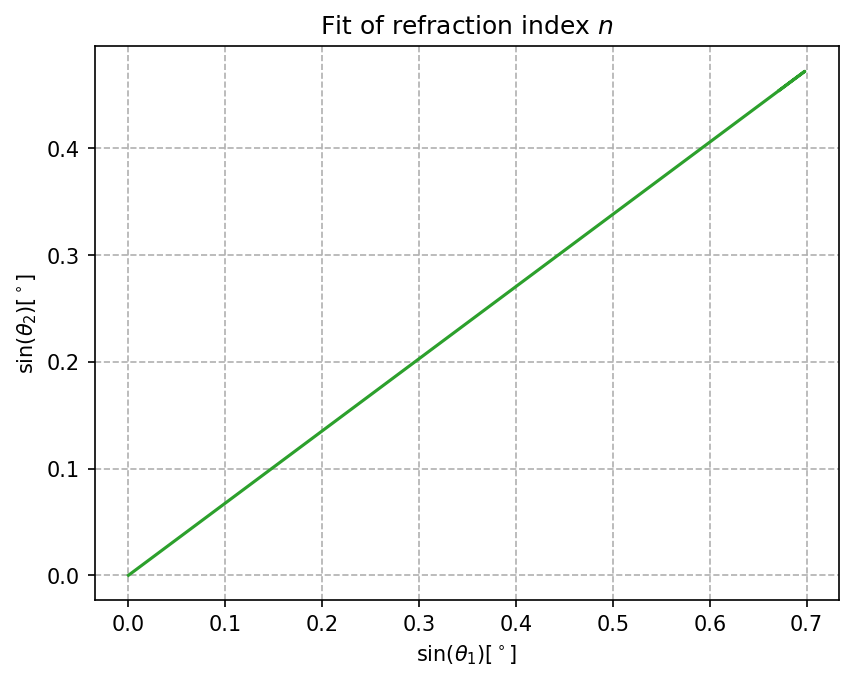

In [56]:
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

p_opt, p_cov = sp.curve_fit(n_fit, np.sin(theta1), np.sin(theta2), sigma = theta2_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
ax.plot(theta2, n_fit(theta2, p_opt[0]), color = 'tab:green', )
ax.set_xlabel(r'$\sin(\theta_1) [^\circ]$')
ax.set_ylabel(r'$\sin(\theta_2) [^\circ]$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$')


print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt[0], 4), round(np.sqrt(p_cov[0][0]), 4)))


